In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statistics import mode
from collections import Counter
from re import sub
from decimal import Decimal

In [618]:
data_ab=pd.read_csv("AB_NYC_2019.csv")
listing=pd.read_csv("listings.csv")
data_subway=pd.read_csv("SUBWAY_ENTRANCE.csv")
data_arrest=pd.read_csv("NYPD_Arrest_Data__Year_to_Date_.csv")
data_wifi=pd.read_csv('NYC_Free_Public_WiFi_03292017.csv')

In [619]:
sub_list=["id","host_id","name","host_name","neighbourhood_cleansed","neighbourhood_group_cleansed","zipcode","latitude","longitude","accommodates","bathrooms","bedrooms","beds","price","instant_bookable","cancellation_policy"]
sub_listing=listing[sub_list]

In [473]:
print(len(set(data_ab['id'])))
print(len(data_ab['id']))

48895
48895


In [474]:
print(len(set(listing['id'])))
print(len(listing['id']))

48377
48377


In [475]:
data_ab[['neighbourhood_group','latitude','longitude',"room_type","minimum_nights","price"]].isna().sum()

neighbourhood_group    0
latitude               0
longitude              0
room_type              0
minimum_nights         0
price                  0
dtype: int64

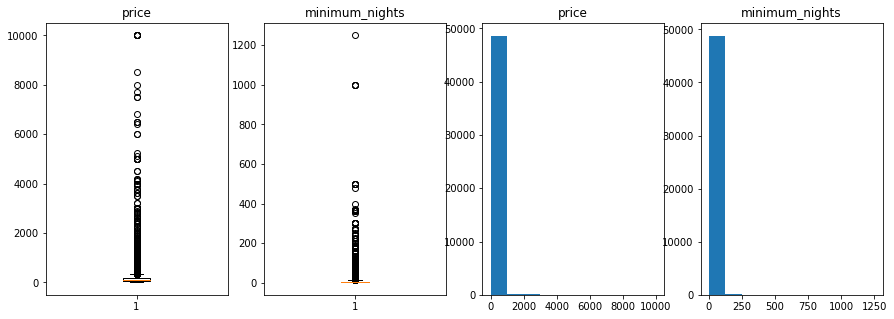

In [441]:
#fig, ax = plt.subplots(1, 4)
plt.figure(figsize=(15,5))
ax1=plt.subplot(1, 4, 1)
ax1.boxplot(data_ab["price"])
ax1.set_title("price")
ax2=plt.subplot(1, 4, 2)
ax2.boxplot(data_ab["minimum_nights"])
ax2.set_title("minimum_nights")
ax3=plt.subplot(1, 4, 3)
ax3.hist(data_ab["price"])
ax3.set_title("price")
ax4=plt.subplot(1, 4, 4)
ax4.hist(data_ab["minimum_nights"])
ax4.set_title("minimum_nights")
plt.show()

In [614]:
data_ab['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [615]:
data_ab['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

In [485]:
sub_listing.isna().sum()

id                                0
host_id                           0
name                             17
host_name                        22
neighbourhood_cleansed            0
neighbourhood_group_cleansed      0
zipcode                         471
latitude                          0
longitude                         0
accommodates                      0
bathrooms                        48
bedrooms                         41
beds                             36
price                             0
instant_bookable                  0
cancellation_policy               0
dtype: int64

In [613]:
sub_listing['neighbourhood_group_cleansed'].value_counts()

Manhattan        21183
Brooklyn         19856
Queens            5853
Bronx             1126
Staten Island      359
Name: neighbourhood_group_cleansed, dtype: int64

In [676]:
sub_listing.rename(columns={'neighbourhood_group_cleansed':'neighbourhood_group'}) 
new_price=[int(Decimal(sub(r'[^\d.]', '', sub_listing['price'][i]))) for i in range(len(sub_listing))]
print(len(new_price))
sub_listing.insert(14,'new_price',new_price) 
#sub_listing

48377


In [493]:
sub_listing[['accommodates','bathrooms','bedrooms','beds','new_price']].describe()

,accommodates,bathrooms,bedrooms,beds,new_price
count,48377.000000,48329.000000,48336.000000,48341.000000,48377.000000
mean,2.854125,1.147655,1.176618,1.552636,152.659549
std,1.888039,0.438552,0.756465,1.120163,258.284567
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,69.000000
50%,2.000000,1.000000,1.000000,1.000000,105.000000
75%,4.000000,1.000000,1.000000,2.000000,175.000000
max,22.000000,15.500000,21.000000,40.000000,10000.000000


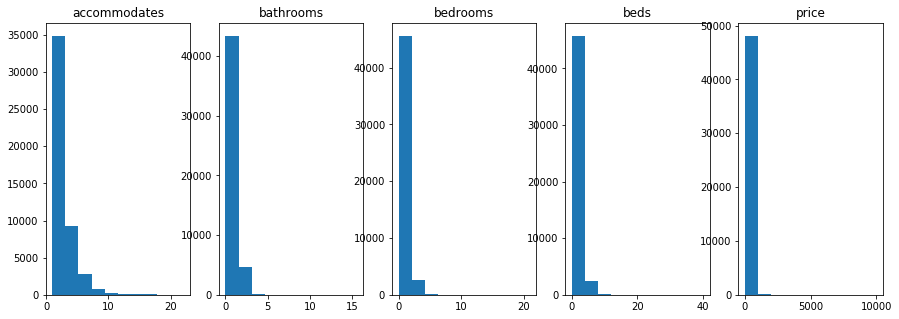

In [677]:
plt.figure(figsize=(15,5))
ax1=plt.subplot(1, 5, 1)
ax1.hist(sub_listing["accommodates"])
ax1.set_title("accommodates")
ax2=plt.subplot(1, 5, 2)
ax2.hist(sub_listing["bathrooms"])
ax2.set_title("bathrooms")
ax3=plt.subplot(1, 5, 3)
ax3.hist(sub_listing["bedrooms"])
ax3.set_title("bedrooms")
ax4=plt.subplot(1, 5, 4)
ax4.hist(sub_listing["beds"])
ax4.set_title("beds")
ax5=plt.subplot(1, 5, 5)
ax5.hist(sub_listing["new_price"])
ax5.set_title("price")
plt.show()

In [620]:
str_sum=0
int_sum=0
for i in sub_listing['zipcode']:
    if type(i)==str:
        str_sum+=1
    elif type(i)==int:
        int_sum+=1
print(str_sum)
print(int_sum)

47906
0


In [621]:
str_sum=0
int_sum=0
for i in data_wifi['POSTCODE']:
    if type(i)==str:
        str_sum+=1
    elif type(i)==int:
        int_sum+=1
print(str_sum)
print(int_sum)

0
3319


In [451]:
sub_listing.shape

(48377, 20)

In [629]:
merge_data=pd.merge(sub_listing, data_ab,on="id",how="inner")
merge_data.isna().sum()

id                                   0
host_id_x                            0
name_x                              17
host_name_x                         20
neighbourhood_cleansed               0
neighbourhood_group_cleansed         0
zipcode                            447
latitude_x                           0
longitude_x                          0
accommodates                         0
bathrooms                           47
bedrooms                            21
beds                                28
price_x                              0
instant_bookable                     0
cancellation_policy                  0
name_y                              16
host_id_y                            0
host_name_y                         20
neighbourhood_group                  0
neighbourhood                        0
latitude_y                           0
longitude_y                          0
room_type                            0
price_y                              0
minimum_nights           

In [630]:
merge_data.shape

(42726, 31)

In [501]:
#print(sum(merge_data['host_id_x']!=merge_data['host_id_y']))
#print(sum(merge_data['name_x']!=merge_data['name_y']))
#print(sum(merge_data['host_name_x']!=merge_data['host_name_y']))
print(sum(merge_data['latitude_x']!=merge_data['latitude_y']))
print(sum(merge_data['longitude_x']!=merge_data['longitude_y']))
#print(sum(merge_data['reviews_per_month_x']!=merge_data['reviews_per_month_y']))
print(sum(merge_data['new_price']!=merge_data['price_y']))
#print(sum(merge_data['neighbourhood_group_x']!=merge_data['neighbourhood_group_y']))

149
152
2662


In [502]:
merge_data[merge_data['latitude_x']!=merge_data['latitude_y']][['latitude_x','latitude_y']]

,latitude_x,latitude_y
825,40.66684,40.66604
863,40.70007,40.70507
1480,40.72668,40.72661
1603,40.77240,40.77445
2729,40.71098,40.71078
...,...,...
42708,40.76802,40.76628
42710,40.77200,40.77192
42713,40.82392,40.82233
42721,40.75606,40.75561


In [503]:
merge_data[merge_data['longitude_x']!=merge_data['longitude_y']][['longitude_x','longitude_y']]

,longitude_x,longitude_y
825,-73.95877,-73.95914
863,-73.93268,-73.93530
1480,-73.94794,-73.94586
1603,-73.98034,-73.98496
2729,-74.01616,-74.01623
...,...,...
42710,-73.95520,-73.95369
42713,-73.94622,-73.94687
42721,-73.96748,-73.96723
42724,-73.95045,-73.94867


In [504]:
merge_data[merge_data['new_price']!=merge_data['price_y']][['new_price','price_y']]

,new_price,price_y
14,199,215
19,115,130
48,149,144
55,90,80
63,350,275
...,...,...
42717,75,45
42719,85,75
42720,85,75
42723,50,40


In [246]:
merge_data[merge_data['neighbourhood_group_x']!=merge_data['neighbourhood_group_y']][['neighbourhood_cleansed','neighbourhood_group_x','neighbourhood_group_y','neighbourhood']]

,neighbourhood_cleansed,neighbourhood_group_x,neighbourhood_group_y,neighbourhood
4081,East Harlem,Manhattan,Brooklyn,Navy Yard
6119,Flushing,Queens,Manhattan,Harlem
10163,Greenpoint,Brooklyn,Queens,Astoria
36842,East Elmhurst,Queens,Manhattan,Upper West Side
37727,Ridgewood,Queens,Brooklyn,Bedford-Stuyvesant


In [505]:
new_latitude=[]
new_longitude=[]
clean_price=[]
for i in range(len(merge_data)):
    if merge_data['latitude_x'][i]==merge_data['latitude_y'][i]:
        new_latitude.append(merge_data['latitude_x'][i])
    else:
        new_latitude.append((merge_data['latitude_x'][i]+merge_data['latitude_y'][i])/2)
    if merge_data['longitude_x'][i]==merge_data['longitude_y'][i]:
        new_longitude.append(merge_data['longitude_x'][i])
    else:
        new_longitude.append((merge_data['longitude_x'][i]+merge_data['longitude_y'][i])/2)
    if merge_data['new_price'][i]==merge_data['price_y'][i]:
        clean_price.append(merge_data['new_price'][i])
    else:
        clean_price.append((merge_data['new_price'][i]+merge_data['price_y'][i])/2)

In [631]:
merge_data['new_latitude']=new_latitude
merge_data['new_longitude']=new_longitude
merge_data['clean_price']=clean_price

In [632]:
merge_data[merge_data['latitude_x']!=merge_data['latitude_y']][['latitude_x','latitude_y',"new_latitude"]]

,latitude_x,latitude_y,new_latitude
825,40.66684,40.66604,40.666440
863,40.70007,40.70507,40.702570
1480,40.72668,40.72661,40.726645
1603,40.77240,40.77445,40.773425
2729,40.71098,40.71078,40.710880
...,...,...,...
42708,40.76802,40.76628,40.767150
42710,40.77200,40.77192,40.771960
42713,40.82392,40.82233,40.823125
42721,40.75606,40.75561,40.755835


In [509]:
merge_data[merge_data['longitude_x']!=merge_data['longitude_y']][['longitude_x','longitude_y','new_longitude']]

,longitude_x,longitude_y,new_longitude
825,-73.95877,-73.95914,-73.958955
863,-73.93268,-73.93530,-73.933990
1480,-73.94794,-73.94586,-73.946900
1603,-73.98034,-73.98496,-73.982650
2729,-74.01616,-74.01623,-74.016195
...,...,...,...
42710,-73.95520,-73.95369,-73.954445
42713,-73.94622,-73.94687,-73.946545
42721,-73.96748,-73.96723,-73.967355
42724,-73.95045,-73.94867,-73.949560


In [510]:
merge_data[merge_data['new_price']!=merge_data['price_y']][['new_price','price_y','clean_price']]

,new_price,price_y,clean_price
14,199,215,207.0
19,115,130,122.5
48,149,144,146.5
55,90,80,85.0
63,350,275,312.5
...,...,...,...
42717,75,45,60.0
42719,85,75,80.0
42720,85,75,80.0
42723,50,40,45.0


In [633]:
selected_merge_data=merge_data[["id","zipcode","neighbourhood_group_cleansed","accommodates","bathrooms","bedrooms","beds","instant_bookable","cancellation_policy","room_type","minimum_nights","new_latitude","new_longitude","clean_price"]]
selected_merge_data.rename(columns={"neighbourhood_group_cleansed":"neighbourhood_group","new_latitude":"latitude","new_longitude":"longitude","clean_price":"price"},inplace=True)
selected_merge_data

,id,zipcode,neighbourhood_group,accommodates,bathrooms,bedrooms,beds,instant_bookable,cancellation_policy,room_type,minimum_nights,latitude,longitude,price
0,3647,10027,Manhattan,2,1.0,1.0,1.0,f,strict_14_with_grace_period,Private room,3,40.809020,-73.941900,150.0
1,3831,11238,Brooklyn,3,1.0,1.0,4.0,f,moderate,Entire home/apt,1,40.685140,-73.959760,89.0
2,5022,10029,Manhattan,1,1.0,NaN,1.0,f,strict_14_with_grace_period,Entire home/apt,10,40.798510,-73.943990,80.0
3,5099,10016,Manhattan,2,1.0,1.0,1.0,f,moderate,Entire home/apt,3,40.747670,-73.975000,200.0
4,5121,11216,Brooklyn,2,NaN,1.0,1.0,f,strict_14_with_grace_period,Private room,45,40.686880,-73.955960,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42721,36483010,10022,Manhattan,3,1.0,1.0,2.0,f,strict_14_with_grace_period,Entire home/apt,6,40.755835,-73.967355,200.0
42722,36484665,11216,Brooklyn,2,1.0,1.0,2.0,f,flexible,Private room,2,40.678530,-73.949950,70.0
42723,36485057,11206,Brooklyn,1,1.0,1.0,1.0,f,flexible,Private room,4,40.701840,-73.933170,45.0
42724,36485431,10027,Manhattan,2,1.0,0.0,1.0,f,moderate,Entire home/apt,10,40.814755,-73.949560,107.5


In [634]:
selected_merge_data.isna().sum()

id                       0
zipcode                447
neighbourhood_group      0
accommodates             0
bathrooms               47
bedrooms                21
beds                    28
instant_bookable         0
cancellation_policy      0
room_type                0
minimum_nights           0
latitude                 0
longitude                0
price                    0
dtype: int64

In [248]:
data_subway.isna().sum()

OBJECTID     0
URL          0
NAME        29
the_geom     0
LINE         0
dtype: int64

In [249]:
data_arrest.isna().sum()

ARREST_KEY             0
ARREST_DATE            0
PD_CD                 51
PD_DESC              475
KY_CD                475
OFNS_DESC            475
LAW_CODE              31
LAW_CAT_CD           655
ARREST_BORO            0
ARREST_PRECINCT        0
JURISDICTION_CODE      0
AGE_GROUP              0
PERP_SEX               0
PERP_RACE              0
X_COORD_CD             0
Y_COORD_CD             0
Latitude               0
Longitude              0
dtype: int64

In [250]:
data_wifi.isna().sum()

BORO             0
the_geom         0
OBJECTID         0
TYPE             0
PROVIDER         0
NAME           230
LOCATION         0
LAT              0
LON              0
X                0
Y                0
LOCATION_T       0
REMARKS        548
CITY             0
SSID             0
SOURCEID      1062
ACTIVATED        0
BOROCODE         0
BORONAME         0
NTACODE          0
NTANAME          0
COUNDIST         0
POSTCODE         0
BOROCD           0
CT2010           0
BOROCT2010       0
BIN              0
BBL              0
DOITT_ID         0
dtype: int64

In [524]:
new_zipcode=[]
impute=[]
for i in range(len(selected_merge_data)):
    #if selected_merge_data['zipcode'][i].isna():
    if type(selected_merge_data['zipcode'][i])!=str:
        wifi_sub=data_wifi[(abs(data_wifi['LAT']-selected_merge_data['latitude'][i])<1e-2) & (abs(data_wifi['LON']-selected_merge_data['longitude'][i])<1e-2)]
        if len(wifi_sub)>0:
            impute_postcode=Counter(data_wifi[(abs(data_wifi['LAT']-selected_merge_data['latitude'][i])<1e-2) & (abs(data_wifi['LON']-selected_merge_data['longitude'][i])<1e-2)]['POSTCODE']).most_common(1)[0][0]
            new_zipcode.append(impute_postcode)
        else:
            new_zipcode.append(0)
    else:
        new_zipcode.append(selected_merge_data['zipcode'][i])


In [526]:
for i in new_zipcode:
    if i==0:
        print(i)

0
0
0
0


In [635]:
selected_merge_data['new_zipcode']=new_zipcode
selected_merge_data[selected_merge_data['new_zipcode']!=selected_merge_data['zipcode']][['new_zipcode','zipcode']]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,new_zipcode,zipcode
287,11249,NaN
682,11237,NaN
1106,10011,NaN
1234,10013,NaN
1514,11103,NaN
...,...,...
42549,10007,NY 10007
42641,10028,NY 10028
42642,10012,NY 10012
42643,10036,NY 10036


In [529]:
selected_merge_data[selected_merge_data['bathrooms'].isna() & selected_merge_data['beds'].isna()]

,id,zipcode,neighbourhood_group,accommodates,bathrooms,bedrooms,beds,instant_bookable,cancellation_policy,room_type,minimum_nights,latitude,longitude,price,new_zipcode
862,363673,10025,Manhattan,1,NaN,1.0,NaN,f,flexible,Private room,7,40.80142,-73.96931,3000.0,10025
1010,468613,10002,Manhattan,1,NaN,1.0,NaN,f,flexible,Private room,1,40.72152,-73.99279,1300.0,10002
1086,505231,10128,Manhattan,1,NaN,1.0,NaN,f,moderate,Private room,1,40.77799,-73.95223,80.0,10128
1394,690849,10009,Manhattan,2,NaN,1.0,NaN,f,flexible,Entire home/apt,3,40.72912,-73.98355,95.0,10009
3344,2232600,10003,Manhattan,2,NaN,NaN,NaN,f,strict_14_with_grace_period,Entire home/apt,1,40.73215,-73.98821,200.0,10003
3434,2284809,11221,Brooklyn,2,NaN,1.0,NaN,t,moderate,Private room,4,40.69982,-73.92490,49.0,11221
6022,4748873,11211,Brooklyn,1,NaN,1.0,NaN,f,flexible,Private room,1,40.71174,-73.94353,100.0,11211
6116,4791964,11211,Brooklyn,2,NaN,1.0,NaN,f,flexible,Private room,1,40.70973,-73.96056,100.0,11211
6171,4822557,11216,Brooklyn,2,NaN,1.0,NaN,f,flexible,Private room,1,40.69253,-73.94681,90.0,11216
7577,6333850,11213,Brooklyn,1,NaN,1.0,NaN,f,flexible,Private room,1,40.67260,-73.92859,120.0,11213


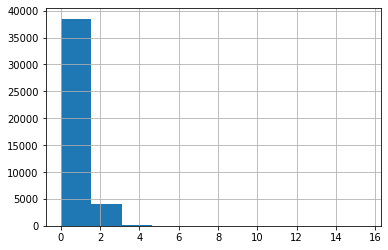

In [636]:
selected_merge_data['bathrooms'].hist()

In [637]:
selected_merge_data['bathrooms'].value_counts()

1.0     36264
2.0      3324
1.5      2022
2.5       391
3.0       269
0.0       120
0.5        90
3.5        76
4.0        54
6.0        21
4.5        14
6.5        13
5.0        13
5.5         5
7.0         2
15.5        1
Name: bathrooms, dtype: int64

In [638]:
selected_merge_data['bedrooms'].value_counts()

1.0     30842
2.0      5583
0.0      3990
3.0      1729
4.0       405
5.0        99
6.0        30
7.0        13
8.0         7
9.0         3
10.0        1
14.0        1
21.0        1
11.0        1
Name: bedrooms, dtype: int64

In [639]:
selected_merge_data['beds'].value_counts()

1.0     27475
2.0      9073
3.0      3095
4.0      1287
0.0       880
5.0       455
6.0       224
7.0        71
8.0        49
9.0        30
11.0       16
12.0       13
10.0       12
13.0        5
16.0        3
15.0        3
21.0        2
40.0        1
14.0        1
26.0        1
17.0        1
22.0        1
Name: beds, dtype: int64

In [660]:
new_bathrooms=[]
new_beds=[]
new_bedrooms=[]
for i in range(len(selected_merge_data)):
    if np.isnan(selected_merge_data['bathrooms'][i]):
        new_bathrooms.append(1.0)
    else:
        new_bathrooms.append(selected_merge_data['bathrooms'][i])
    if np.isnan(selected_merge_data['beds'][i]):
        new_beds.append(1.0)
    else:
        new_beds.append(selected_merge_data['beds'][i])
    if np.isnan(selected_merge_data['bedrooms'][i]):
        new_bedrooms.append(1.0)
    else:
        new_bedrooms.append(selected_merge_data['bedrooms'][i])
print(len(new_bathrooms))
print(len(new_beds))
print(len(new_bedrooms))

42726
42726
42726


In [644]:
selected_merge_data['bathrooms'].value_counts()

1.0     36264
2.0      3324
1.5      2022
2.5       391
3.0       269
0.0       120
0.5        90
3.5        76
4.0        54
6.0        21
4.5        14
6.5        13
5.0        13
5.5         5
7.0         2
15.5        1
Name: bathrooms, dtype: int64

(array([4.0551e+04, 2.0370e+03, 1.0700e+02, 2.2000e+01, 4.0000e+00,
        3.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 0.,  4.,  8., 12., 16., 20., 24., 28., 32., 36., 40.]),
 <a list of 10 Patch objects>)

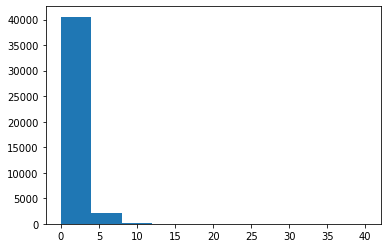

In [667]:
plt.hist(new_beds)

In [668]:
selected_merge_data['new_bathrooms']=new_bathrooms
selected_merge_data['new_beds']=new_beds
selected_merge_data['new_bedrooms']=new_bedrooms
selected_merge_data.isna().sum()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

id                       0
zipcode                447
neighbourhood_group      0
accommodates             0
bathrooms               47
bedrooms                21
beds                    28
instant_bookable         0
cancellation_policy      0
room_type                0
minimum_nights           0
latitude                 0
longitude                0
price                    0
new_zipcode              0
new_bathrooms            0
new_beds                 0
new_bedrooms             0
dtype: int64

In [260]:
longtitude_list_subway=[]
latitude_list_subway=[]
for i in range(len(data_subway)):
    longtitude_list_subway.append(float(data_subway['the_geom'][i].split(' ')[1][1:]))
    latitude_list_subway.append(float(data_subway['the_geom'][i].split(' ')[2][0:14]))

In [261]:
data_subway['longitude']=longtitude_list_subway
data_subway['latitude']=latitude_list_subway
#data_subway.head()

In [264]:
number_of_subway_entrance=[]
line_each_hotel=[]
for i in range(len(selected_merge_data)):
    hotel_longitude=selected_merge_data['longitude'][i]
    hotel_latitude=selected_merge_data['latitude'][i]
    subway_hotel=data_subway[(abs(hotel_longitude-data_subway['longitude'])<7e-3)&(abs(data_subway['latitude']-hotel_latitude)<7e-3)]
    if len(subway_hotel)>0:
        number_of_subway_entrance.append(len(subway_hotel))
        line_each_hotel.append(set(subway_hotel['LINE']))
    else:
        number_of_subway_entrance.append(0)
        line_each_hotel.append(0)

In [267]:
number_of_wifi=[]
number_of_free_wifi=[]
number_of_limited_free_wifi=[]
number_of_partner_site=[]
main_wifi_provider=[]
for i in range(len(selected_merge_data)):
    hotel_longitude=selected_merge_data['longitude'][i]
    hotel_latitude=selected_merge_data['latitude'][i]
    wifi_hotel=data_wifi[(abs(hotel_longitude-data_wifi['LON'])<7e-3)&(abs(data_wifi['LAT']-hotel_latitude)<7e-3)]
    if len(wifi_hotel)>0:
        number_of_wifi.append(len(wifi_hotel))
        number_of_free_wifi.append(sum(wifi_hotel['TYPE']=='Free'))
        number_of_limited_free_wifi.append(sum(wifi_hotel['TYPE']=='Limited Free'))
        number_of_partner_site.append(sum(wifi_hotel['TYPE']=='Partner Site'))
        main_wifi_provider.append(Counter(wifi_hotel['PROVIDER']).most_common(1)[0][0])
    else:
        number_of_wifi.append(0)
        number_of_free_wifi.append(0)
        number_of_limited_free_wifi.append(0)
        number_of_partner_site.append(0)
        main_wifi_provider.append(0)

In [270]:
number_of_arrest=[]
major_Borough_of_arrest=[]
major_age_group_of_arrest=[]
major_sex_of_arrest=[]
major_race_of_arrest=[]
for i in range(len(selected_merge_data)):
    hotel_longitude=selected_merge_data['longitude'][i]
    hotel_latitude=selected_merge_data['latitude'][i]
    arrest_hotel=data_arrest[(abs(hotel_longitude-data_arrest['Longitude'])<7e-3)&(abs(data_arrest['Latitude']-hotel_latitude)<7e-3)]
    if len(arrest_hotel)>0:
        number_of_arrest.append(len(arrest_hotel))
        major_Borough_of_arrest.append(Counter(arrest_hotel['ARREST_BORO']).most_common(1)[0][0])
        major_age_group_of_arrest.append(Counter(arrest_hotel['AGE_GROUP']).most_common(1)[0][0])
        major_sex_of_arrest.append(Counter(arrest_hotel['PERP_SEX']).most_common(1)[0][0])
        major_race_of_arrest.append(Counter(arrest_hotel['PERP_RACE']).most_common(1)[0][0])
    else:
        number_of_arrest.append(0)
        major_Borough_of_arrest.append(0)
        major_age_group_of_arrest.append(0)
        major_sex_of_arrest.append(0)
        major_race_of_arrest.append(0)

In [538]:
#merge all
selected_merge_data['number_of_subway_entrance']=number_of_subway_entrance
selected_merge_data['line_each_hotel']=line_each_hotel
selected_merge_data['number_of_wifi']=number_of_wifi
selected_merge_data['number_of_free_wifi']=number_of_free_wifi
selected_merge_data['main_wifi_provider']=main_wifi_provider
selected_merge_data['number_of_arrest']=number_of_arrest
selected_merge_data['major_age_group_of_arrest']=major_age_group_of_arrest
selected_merge_data['major_sex_of_arrest']=major_sex_of_arrest
selected_merge_data

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



,id,zipcode,neighbourhood_group,accommodates,bathrooms,bedrooms,beds,instant_bookable,cancellation_policy,room_type,minimum_nights,latitude,longitude,price,new_zipcode,new_bathrooms,new_beds,new_bedrooms,number_of_subway_entrance,line_each_hotel,number_of_wifi,number_of_free_wifi,main_wifi_provider,number_of_arrest,major_age_group_of_arrest,major_sex_of_arrest
0,3647,10027,Manhattan,2,1.0,1.0,1.0,f,strict_14_with_grace_period,Private room,3,40.809020,-73.941900,150.0,10027,1.0,1.0,1.0,13,"{4-5-6, 2-3}",100,84,Harlem,2071,25-44,M
1,3831,11238,Brooklyn,3,1.0,1.0,4.0,f,moderate,Entire home/apt,1,40.685140,-73.959760,89.0,11238,1.0,1.0,1.0,16,"{G, A-FS, C, A-C-FS}",16,16,LinkNYC - Citybridge,561,25-44,M
2,5022,10029,Manhattan,1,1.0,NaN,1.0,f,strict_14_with_grace_period,Entire home/apt,10,40.798510,-73.943990,80.0,10029,1.0,1.0,1.0,17,"{6, 4-5-6, 2-3}",62,54,LinkNYC - Citybridge,2002,25-44,M
3,5099,10016,Manhattan,2,1.0,1.0,1.0,f,moderate,Entire home/apt,3,40.747670,-73.975000,200.0,10016,1.0,1.0,1.0,21,"{GS-4-5-6-7, 6, B-D-F-M-7}",109,108,LinkNYC - Citybridge,642,25-44,M
4,5121,11216,Brooklyn,2,NaN,1.0,1.0,f,strict_14_with_grace_period,Private room,45,40.686880,-73.955960,60.0,11216,1.0,1.0,1.0,15,"{G, A-FS, A-C, A-C-FS}",12,12,LinkNYC - Citybridge,681,25-44,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42721,36483010,10022,Manhattan,3,1.0,1.0,2.0,f,strict_14_with_grace_period,Entire home/apt,6,40.755835,-73.967355,200.0,10022,1.0,1.0,1.0,26,"{E-M, E-M-6, N-Q-R-4-5-6}",114,111,LinkNYC - Citybridge,746,25-44,M
42722,36484665,11216,Brooklyn,2,1.0,1.0,2.0,f,flexible,Private room,2,40.678530,-73.949950,70.0,11216,1.0,1.0,1.0,6,"{A-C, A-FS, A-C-FS}",26,26,LinkNYC - Citybridge,615,25-44,M
42723,36485057,11206,Brooklyn,1,1.0,1.0,1.0,f,flexible,Private room,4,40.701840,-73.933170,45.0,11206,1.0,1.0,1.0,9,"{L, J-M-Z, M}",5,5,LinkNYC - Citybridge,553,25-44,M
42724,36485431,10027,Manhattan,2,1.0,0.0,1.0,f,moderate,Entire home/apt,10,40.814755,-73.949560,107.5,10027,1.0,1.0,1.0,18,"{A-B-C-D, 1, 2-3, B-C}",81,81,LinkNYC - Citybridge,1879,25-44,M


In [669]:
final_clean_data=selected_merge_data.drop(['zipcode','bathrooms','beds',"bedrooms"],axis=1)
final_clean_data.rename({"new_zipcode":"zipcode","new_bathrooms":"bathrooms","new_beds":"beds","new_bedrooms":"bedrooms"},axis=1,inplace=True)
final_clean_data.to_csv("final_clean_data.csv")
final_clean_data

,id,neighbourhood_group,accommodates,instant_bookable,cancellation_policy,room_type,minimum_nights,latitude,longitude,price,zipcode,bathrooms,beds,bedrooms
0,3647,Manhattan,2,f,strict_14_with_grace_period,Private room,3,40.809020,-73.941900,150.0,10027,1.0,1.0,1.0
1,3831,Brooklyn,3,f,moderate,Entire home/apt,1,40.685140,-73.959760,89.0,11238,1.0,4.0,1.0
2,5022,Manhattan,1,f,strict_14_with_grace_period,Entire home/apt,10,40.798510,-73.943990,80.0,10029,1.0,1.0,1.0
3,5099,Manhattan,2,f,moderate,Entire home/apt,3,40.747670,-73.975000,200.0,10016,1.0,1.0,1.0
4,5121,Brooklyn,2,f,strict_14_with_grace_period,Private room,45,40.686880,-73.955960,60.0,11216,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42721,36483010,Manhattan,3,f,strict_14_with_grace_period,Entire home/apt,6,40.755835,-73.967355,200.0,10022,1.0,2.0,1.0
42722,36484665,Brooklyn,2,f,flexible,Private room,2,40.678530,-73.949950,70.0,11216,1.0,2.0,1.0
42723,36485057,Brooklyn,1,f,flexible,Private room,4,40.701840,-73.933170,45.0,11206,1.0,1.0,1.0
42724,36485431,Manhattan,2,f,moderate,Entire home/apt,10,40.814755,-73.949560,107.5,10027,1.0,1.0,0.0


In [542]:
final_clean_data.isna().sum()

id                           0
neighbourhood_group          0
accommodates                 0
instant_bookable             0
cancellation_policy          0
room_type                    0
minimum_nights               0
latitude                     0
longitude                    0
price                        0
zipcode                      0
bathrooms                    0
beds                         0
bedrooms                     0
number_of_subway_entrance    0
line_each_hotel              0
number_of_wifi               0
number_of_free_wifi          0
main_wifi_provider           0
number_of_arrest             0
major_age_group_of_arrest    0
major_sex_of_arrest          0
dtype: int64

In [543]:
final_clean_data[final_clean_data['zipcode']==0]

,id,neighbourhood_group,accommodates,instant_bookable,cancellation_policy,room_type,minimum_nights,latitude,longitude,price,zipcode,bathrooms,beds,bedrooms,number_of_subway_entrance,line_each_hotel,number_of_wifi,number_of_free_wifi,main_wifi_provider,number_of_arrest,major_age_group_of_arrest,major_sex_of_arrest
5854,4641291,Queens,2,f,flexible,Private room,1,40.72401,-73.72901,99.0,0,1.0,1.0,1.0,0,0,0,0,0,603,25-44,M
26903,22420304,Staten Island,2,f,flexible,Private room,2,40.61422,-74.13167,40.0,0,1.0,1.0,1.0,0,0,0,0,0,26,25-44,M
28380,23901118,Queens,2,t,flexible,Private room,2,40.67360,-73.82092,65.0,0,1.0,1.0,1.0,0,0,0,0,0,119,25-44,M
34018,29688392,Queens,2,f,flexible,Private room,2,40.72915,-73.79448,70.0,0,1.0,1.0,1.0,0,0,0,0,0,26,18-24,M


In [578]:
for i in final_clean_data['zipcode']:
    if type(i)==str:
        if len(i)>5:
            print(i)

11249
11249
11103-3233
10002-2289
11385-2308
11413-3220
NY 10005
NY 10016
NY 10016
NY 10007
NY 10004
NY 10007
NY 10002
NY 10024
NY 10011
NY 10023
NY 10005
NY 10005
NY 10014
NY 10075
NY 10005
NY 10007
NY 10014
NY 10007
NY 10023
NY 10065
NY 10005
NY 10011
NY 10011
NY 10019
NY 10016
NY 10018
NY 10007
NY 10011
NY 10014
NY 10014
NY 10007
NY 10011
NY 10036
NY 10002
NY 10024
NY 10011
NY 10007
NY 10002
NY 10016
NY 10024
NY 10028
NY 10036
NY 10016
NY 10007
NY 10019
NY 10022
NY 10038
NY 10018
NY 10036
NY 10011
NY 10003
NY 10011
NY 10005
NY 10016
NY 10003
NY 10007
NY 10011
NY 10007
NY 10036
NY 10011
NY 10036
NY 10011
NY 10016
NY 10016
NY 10036
NY 10018
NY 10007
NY 10036
NY 10016
NY 10011
NY 10007
NY 10016
NY 10007
NY 10006
NY 10014
NY 10036
NY 10005
NY 10004
NY 10016
NY 10036
NY 10005
NY 10023
NY 10002
NY 10023
NY 10011
NY 10002
NY 10002
NY 10014
NY 10016
NY 10011
NY 10007
NY 10036
NY 10005
NY 10014
NY 10016
NY 10014
NY 10011
NY 10014
NY 10016
NY 10011
NY 10011
NY 10011
NY 10075
NY 10011
NY 11201

In [588]:
for i in final_clean_data['zipcode']:
    if type(i)==str and len(i)>5:
        print(i)
    if type(i)!=str:
        print([i,type(i)])

[11249, <class 'int'>]
[11237, <class 'int'>]
[10011, <class 'int'>]
[10013, <class 'int'>]
[11103, <class 'int'>]
[11206, <class 'int'>]
[11435, <class 'int'>]
[11213, <class 'int'>]
[10019, <class 'int'>]
[11101, <class 'int'>]
[10040, <class 'int'>]
[10011, <class 'int'>]
[10022, <class 'int'>]
[11222, <class 'int'>]
[11101, <class 'int'>]
[11201, <class 'int'>]
[11225, <class 'int'>]
[11206, <class 'int'>]
[10003, <class 'int'>]
[10011, <class 'int'>]
[11418, <class 'int'>]
[11237, <class 'int'>]
[11211, <class 'int'>]
[10002, <class 'int'>]
[11201, <class 'int'>]
11249
11249
[10457, <class 'int'>]
[10019, <class 'int'>]
[11226, <class 'int'>]
[11101, <class 'int'>]
[11238, <class 'int'>]
[10013, <class 'int'>]
[11249, <class 'int'>]
[10019, <class 'int'>]
[11232, <class 'int'>]
[10011, <class 'int'>]
[11249, <class 'int'>]
[10032, <class 'int'>]
[10033, <class 'int'>]
[11203, <class 'int'>]
[10027, <class 'int'>]
[11201, <class 'int'>]
[10019, <class 'int'>]
[10003, <class 'int'>]

In [608]:
new_zipcode=[]
for i in range(len(final_clean_data['zipcode'])):
    if type(final_clean_data['zipcode'][i])==int:
        new_zipcode.append(str(final_clean_data['zipcode'][i]))
    elif len(final_clean_data['zipcode'][i])==10:
        new_zipcode.append(final_clean_data['zipcode'][i][0:5])
    elif len(final_clean_data['zipcode'][i])==8:
        new_zipcode.append(final_clean_data['zipcode'][i][3:8])
    elif len(final_clean_data['zipcode'][i])==11:
        new_zipcode.append(final_clean_data['zipcode'][i][0:5])
    else:
        new_zipcode.append(final_clean_data['zipcode'][i].strip())
print(len(new_zipcode))       

42726


In [670]:
final_clean_data.drop('zipcode',axis=1)
final_clean_data['zipcode']=new_zipcode
final_clean_data.to_csv("final_clean_data.csv")

In [671]:
final_clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42726 entries, 0 to 42725
Data columns (total 14 columns):
id                     42726 non-null int64
neighbourhood_group    42726 non-null object
accommodates           42726 non-null int64
instant_bookable       42726 non-null object
cancellation_policy    42726 non-null object
room_type              42726 non-null object
minimum_nights         42726 non-null int64
latitude               42726 non-null float64
longitude              42726 non-null float64
price                  42726 non-null float64
zipcode                42726 non-null object
bathrooms              42726 non-null float64
beds                   42726 non-null float64
bedrooms               42726 non-null float64
dtypes: float64(6), int64(3), object(5)
memory usage: 4.9+ MB


In [624]:
final_clean_data[final_clean_data['line_each_hotel']==0]

,id,neighbourhood_group,accommodates,instant_bookable,cancellation_policy,room_type,minimum_nights,latitude,longitude,price,zipcode,bathrooms,beds,bedrooms,number_of_subway_entrance,line_each_hotel,number_of_wifi,number_of_free_wifi,main_wifi_provider,number_of_arrest,major_age_group_of_arrest,major_sex_of_arrest
28,9782,Brooklyn,2,t,moderate,Private room,4,40.72219,-73.93762,55.0,11222,1.0,1.0,1.0,0,0,0,0,0,114,25-44,M
53,15338,Brooklyn,2,t,moderate,Private room,4,40.72401,-73.93788,49.0,11222,1.0,1.0,1.0,0,0,0,0,0,91,25-44,M
63,16595,Brooklyn,4,f,strict_14_with_grace_period,Entire home/apt,1,40.70933,-73.96792,312.5,11249,1.0,1.0,1.0,0,0,7,7,LinkNYC - Citybridge,109,25-44,M
66,17037,Manhattan,2,f,strict_14_with_grace_period,Entire home/apt,9,40.72162,-73.98008,230.0,10009,1.0,1.0,1.0,0,0,13,9,LinkNYC - Citybridge,1116,25-44,M
123,31902,Brooklyn,2,f,strict_14_with_grace_period,Private room,2,40.63188,-73.93248,77.0,11234,1.0,1.0,1.0,0,0,0,0,0,175,25-44,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42686,36449668,Brooklyn,2,t,moderate,Private room,1,40.68927,-73.93665,50.0,11221,1.0,1.0,1.0,0,0,1,1,BPL,460,25-44,M
42706,36458668,Queens,2,t,flexible,Private room,3,40.74387,-73.82556,68.0,11355,1.0,1.0,1.0,0,0,3,1,SPECTRUM,72,25-44,M
42709,36469741,Queens,4,t,strict_14_with_grace_period,Private room,2,40.76726,-73.93936,93.0,11106,1.0,1.0,1.0,0,0,1,1,QPL,168,25-44,M
42714,36477307,Brooklyn,6,t,moderate,Entire home/apt,1,40.63116,-73.92616,170.0,11234,1.0,1.0,1.0,0,0,1,1,BPL,232,25-44,M


In [674]:
#final_clean_data['minimum_nights'].value_counts()
final_clean_data[["latitude","longitude","minimum_nights","price","accommodates","bathrooms","bedrooms","beds"]].describe()

,latitude,longitude,minimum_nights,price,accommodates,bathrooms,bedrooms,beds
count,42726.000000,42726.000000,42726.000000,42726.000000,42726.000000,42726.000000,42726.000000,42726.000000
mean,40.728669,-73.951885,7.061906,149.409107,2.820554,1.139798,1.164186,1.536090
std,0.054610,0.046106,21.269277,236.788257,1.828231,0.425489,0.734811,1.096127
min,40.499790,-74.244420,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,40.689503,-73.982710,1.000000,69.000000,2.000000,1.000000,1.000000,1.000000
50%,40.722470,-73.955500,2.000000,105.000000,2.000000,1.000000,1.000000,1.000000
75%,40.763030,-73.936100,5.000000,175.000000,4.000000,1.000000,1.000000,2.000000
max,40.911690,-73.712990,1250.000000,10000.000000,19.000000,15.500000,21.000000,40.000000


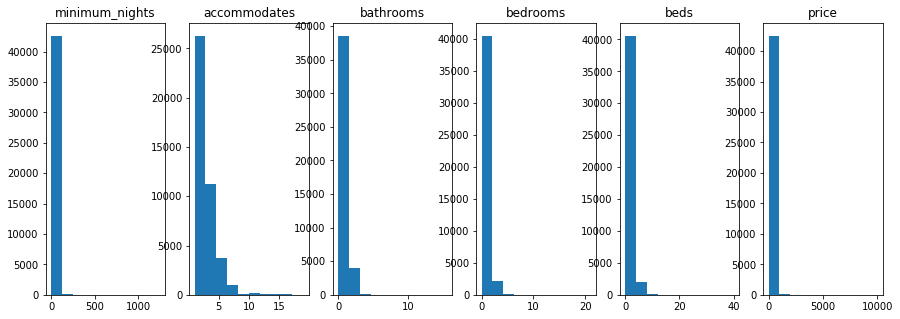

In [678]:
plt.figure(figsize=(15,5))
ax6=plt.subplot(1, 6, 1)
ax6.hist(final_clean_data["minimum_nights"])
ax6.set_title("minimum_nights")
ax1=plt.subplot(1, 6, 2)
ax1.hist(final_clean_data["accommodates"])
ax1.set_title("accommodates")
ax2=plt.subplot(1, 6, 3)
ax2.hist(final_clean_data["bathrooms"])
ax2.set_title("bathrooms")
ax3=plt.subplot(1, 6, 4)
ax3.hist(final_clean_data["bedrooms"])
ax3.set_title("bedrooms")
ax4=plt.subplot(1, 6, 5)
ax4.hist(final_clean_data["beds"])
ax4.set_title("beds")
ax5=plt.subplot(1, 6, 6)
ax5.hist(final_clean_data["price"])
ax5.set_title("price")
plt.show()

In [544]:
final_clean_data[final_clean_data['number_of_subway_entrance']==0]

,id,neighbourhood_group,accommodates,instant_bookable,cancellation_policy,room_type,minimum_nights,latitude,longitude,price,zipcode,bathrooms,beds,bedrooms,number_of_subway_entrance,line_each_hotel,number_of_wifi,number_of_free_wifi,main_wifi_provider,number_of_arrest,major_age_group_of_arrest,major_sex_of_arrest
28,9782,Brooklyn,2,t,moderate,Private room,4,40.72219,-73.93762,55.0,11222,1.0,1.0,1.0,0,0,0,0,0,114,25-44,M
53,15338,Brooklyn,2,t,moderate,Private room,4,40.72401,-73.93788,49.0,11222,1.0,1.0,1.0,0,0,0,0,0,91,25-44,M
63,16595,Brooklyn,4,f,strict_14_with_grace_period,Entire home/apt,1,40.70933,-73.96792,312.5,11249,1.0,1.0,1.0,0,0,7,7,LinkNYC - Citybridge,109,25-44,M
66,17037,Manhattan,2,f,strict_14_with_grace_period,Entire home/apt,9,40.72162,-73.98008,230.0,10009,1.0,1.0,1.0,0,0,13,9,LinkNYC - Citybridge,1116,25-44,M
123,31902,Brooklyn,2,f,strict_14_with_grace_period,Private room,2,40.63188,-73.93248,77.0,11234,1.0,1.0,1.0,0,0,0,0,0,175,25-44,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42686,36449668,Brooklyn,2,t,moderate,Private room,1,40.68927,-73.93665,50.0,11221,1.0,1.0,1.0,0,0,1,1,BPL,460,25-44,M
42706,36458668,Queens,2,t,flexible,Private room,3,40.74387,-73.82556,68.0,11355,1.0,1.0,1.0,0,0,3,1,SPECTRUM,72,25-44,M
42709,36469741,Queens,4,t,strict_14_with_grace_period,Private room,2,40.76726,-73.93936,93.0,11106,1.0,1.0,1.0,0,0,1,1,QPL,168,25-44,M
42714,36477307,Brooklyn,6,t,moderate,Entire home/apt,1,40.63116,-73.92616,170.0,11234,1.0,1.0,1.0,0,0,1,1,BPL,232,25-44,M


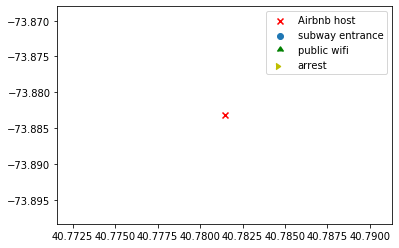

In [281]:
subway_1=data_subway[(abs(selected_merge_data['longitude'][6119]-data_subway['longitude'])<7e-3)&(abs(data_subway['latitude']-selected_merge_data['latitude'][6119])<7e-3)]
wifi_1=data_wifi[(abs(selected_merge_data['longitude'][6119]-data_wifi['LON'])<7e-3)&(abs(data_wifi['LAT']-selected_merge_data['latitude'][6119])<7e-3)]
arrest_1=data_arrest[(abs(selected_merge_data['longitude'][6119]-data_arrest['Longitude'])<7e-3)&(abs(data_arrest['Latitude']-selected_merge_data['latitude'][6119])<7e-3)]

plt.scatter(selected_merge_data['latitude'][6119],selected_merge_data['longitude'][6119],color='r',marker="x",label='Airbnb host')
plt.scatter(subway_1['latitude'],subway_1['longitude'],label='subway entrance')
plt.scatter(wifi_1['LAT'],wifi_1['LON'],color="g",marker=10,label='public wifi')
plt.scatter(arrest_1['Latitude'],arrest_1['Longitude'],color="y",marker=5,label='arrest')
plt.legend()
plt.show()

In [274]:
arrest_1

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
88,199130675,06/30/2019,205.0,"TRESPASS 2, CRIMINAL",352.0,CRIMINAL TRESPASS,PL 1401501,M,M,25,2,18-24,F,WHITE,1000980,231749,40.802766,-73.939572
93,199126327,06/30/2019,779.0,"PUBLIC ADMINISTRATION,UNCLASSIFIED FELONY",126.0,MISCELLANEOUS PENAL LAW,PL 215510B,F,M,32,0,25-44,M,BLACK,1000493,236572,40.816005,-73.941320
194,199130678,06/30/2019,205.0,"TRESPASS 2, CRIMINAL",352.0,CRIMINAL TRESPASS,PL 1401501,M,M,25,2,18-24,M,BLACK,1000980,231749,40.802766,-73.939572
440,199103812,06/29/2019,441.0,"LARCENY,GRAND OF AUTO",110.0,GRAND LARCENY OF MOTOR VEHICLE,PL 1553008,F,M,32,0,18-24,M,BLACK,1000534,235772,40.813809,-73.941174
470,199099656,06/29/2019,259.0,"MISCHIEF,CRIMINAL UNCLASSIFIED 4TH DEG",351.0,CRIMINAL MISCHIEF & RELATED OFFENSES,PL 1450001,M,M,25,0,25-44,M,WHITE HISPANIC,1000538,232589,40.805072,-73.941167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113189,191720931,1/1/19,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,25,0,45-64,M,BLACK,1001354,234576,40.810524,-73.938214
113202,191731990,1/1/19,269.0,"MISCHIEF,CRIMINAL, UNCL 2ND",121.0,CRIMINAL MISCHIEF & RELATED OFFENSES,PL 1450502,F,M,32,0,45-64,F,BLACK,1000693,234939,40.811522,-73.940601
113495,191722977,1/1/19,511.0,"CONTROLLED SUBSTANCE, POSSESSION 7",235.0,DANGEROUS DRUGS,PL 2200300,M,M,25,0,25-44,M,BLACK,1001575,232339,40.804384,-73.937422
113558,191704104,1/1/19,782.0,"WEAPONS, POSSESSION, ETC",236.0,DANGEROUS WEAPONS,PL 2650101,M,M,28,0,25-44,M,BLACK,998253,233408,40.807324,-73.949419


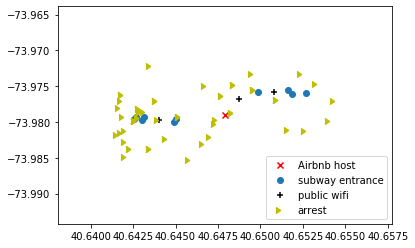

In [244]:
subway_1=data_subway[(abs(data_ab['longitude'][1000]-data_subway['longitude'])<7e-3)&(abs(data_subway['latitude']-data_ab['latitude'][1000])<7e-3)]
wifi_1=data_wifi[(abs(data_ab['longitude'][1000]-data_wifi['LON'])<7e-3)&(abs(data_wifi['LAT']-data_ab['latitude'][1000])<7e-3)]
arrest_1=data_arrest[(abs(data_ab['longitude'][1000]-data_arrest['Longitude'])<7e-3)&(abs(data_arrest['Latitude']-data_ab['latitude'][1000])<7e-3)]

plt.scatter(data_ab['latitude'][1000],data_ab['longitude'][1000],color='r',marker="x",label='Airbnb host')
plt.scatter(subway_1['latitude'],subway_1['longitude'],label='subway entrance',marker='o')
plt.scatter(wifi_1['LAT'],wifi_1['LON'],color="k",marker='+',label='public wifi')
plt.scatter(arrest_1['Latitude'],arrest_1['Longitude'],color="y",marker=5,label='arrest')
plt.legend()
plt.show()

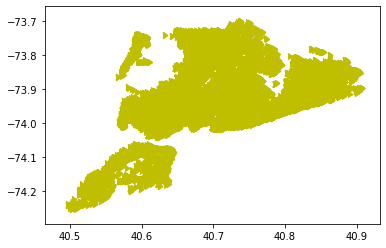

In [246]:
plt.scatter(data_arrest['Latitude'],data_arrest['Longitude'],color="y",marker=5)
plt.show()

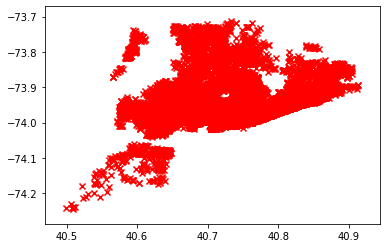

In [248]:
plt.scatter(data_ab['latitude'],data_ab['longitude'],color='r',marker="x")
plt.show()

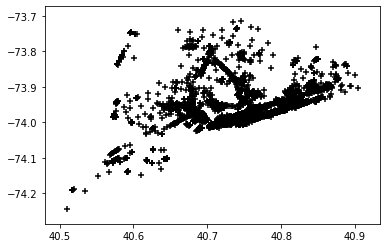

In [250]:
plt.scatter(data_wifi['LAT'],data_wifi['LON'],color="k",marker='+')
plt.show()

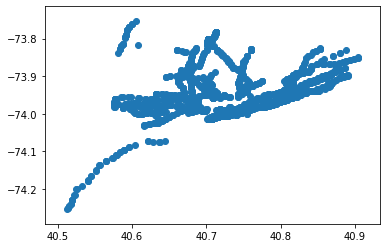

In [251]:
plt.scatter(latitude_list_subway,longtitude_list_subway,marker='o')
plt.show()

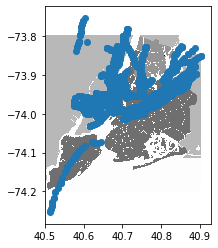

In [82]:
im = plt.imread("New_York_City.png",0)
fig, ax = plt.subplots()
ax.imshow(im,extent=[40.5,40.9,-74.2,-73.8])
ax.scatter(latitude_list_subway,longtitude_list_subway)

In [232]:
data_ab['number_of_subway_entrance']=number_of_subway_entrance
data_ab['line_each_hotel']=line_each_hotel
data_ab['number_of_wifi']=number_of_wifi
data_ab['number_of_free_wifi']=number_of_free_wifi
data_ab['number_of_limited_free_wifi']=number_of_limited_free_wifi
data_ab['number_of_partner_site']=number_of_partner_site
data_ab['main_wifi_provider']=main_wifi_provider
data_ab['number_of_arrest']=number_of_arrest
data_ab['major_Borough_of_arrest']=major_Borough_of_arrest
data_ab['major_age_group_of_arrest']=major_age_group_of_arrest
data_ab['major_sex_of_arrest']=major_sex_of_arrest
data_ab['major_race_of_arrest']=major_race_of_arrest

#data_ab

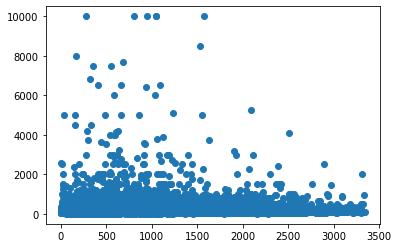

In [230]:
plt.scatter(data_ab['number_of_arrest'],data['price'])
plt.show()

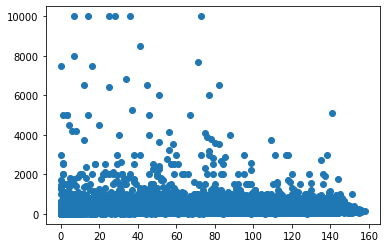

In [233]:
plt.scatter(data_ab['number_of_wifi'],data['price'])
plt.show()

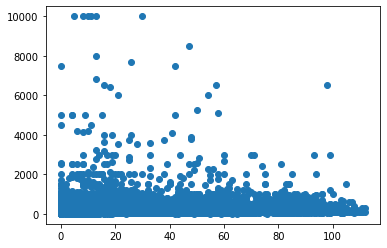

In [268]:
plt.scatter(data_ab['number_of_subway_entrance'],data['price'])
plt.show()

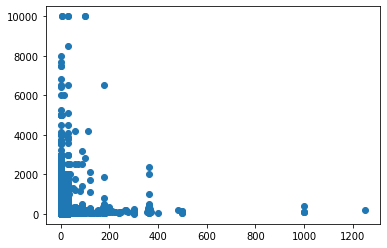

In [235]:
plt.scatter(data_ab['minimum_nights'],data['price'])
plt.show()

In [236]:
data_ab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 28 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

In [238]:
data_ab['major_Borough_of_arrest'].replace(['B', 'S','K','M','Q'], ['Bronx','Staten Island','Brooklyn','Manhattan','Queens'], inplace=True)
data_ab[['neighbourhood_group','neighbourhood','major_Borough_of_arrest']]

,neighbourhood_group,neighbourhood,major_Borough_of_arrest
0,Brooklyn,Kensington,Brooklyn
1,Manhattan,Midtown,Manhattan
2,Manhattan,Harlem,Manhattan
3,Brooklyn,Clinton Hill,Brooklyn
4,Manhattan,East Harlem,Manhattan
...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,Brooklyn
48891,Brooklyn,Bushwick,Brooklyn
48892,Manhattan,Harlem,Manhattan
48893,Manhattan,Hell's Kitchen,Manhattan


In [241]:
data_ab[data_ab['neighbourhood_group']!=data_ab['major_Borough_of_arrest']][['neighbourhood_group','major_Borough_of_arrest']]

,neighbourhood_group,major_Borough_of_arrest
53,Brooklyn,Queens
132,Brooklyn,Queens
227,Manhattan,Queens
321,Brooklyn,Queens
327,Brooklyn,Queens
...,...,...
47574,Queens,Brooklyn
48412,Queens,Brooklyn
48547,Queens,Brooklyn
48584,Brooklyn,Queens


In [276]:
print(data_ab['price'].max())
print(data_ab['price'].min())
print(data_ab[(data_ab['number_of_arrest']<1500)&(data_ab['price']>1000)]['price'].mean())
print(data_ab[(data_ab['number_of_arrest']>=1500)&(data_ab['price']>1000)]['price'].mean())

10000
0
2467.349514563107
2572.4848484848485


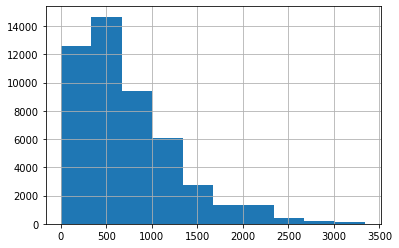

In [259]:
data_ab['number_of_arrest'].hist()

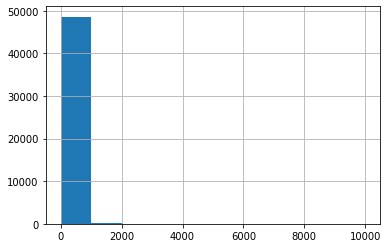

In [270]:
data_ab['price'].hist()
plt.show()

In [277]:
data_ab[data_ab['price']>1000]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,number_of_free_wifi,number_of_limited_free_wifi,number_of_partner_site,main_wifi_provider,number_of_arrest,major_Borough_of_arrest,major_age_group_of_arrest,major_sex_of_arrest,major_race_of_arrest,number_of_wifi
496,174966,Luxury 2Bed/2.5Bath Central Park View,836168,Henry,Manhattan,Upper West Side,40.77350,-73.98697,Entire home/apt,2000,...,56,8,0,LinkNYC - Citybridge,528,Manhattan,25-44,M,BLACK,64
762,273190,6 Bedroom Landmark West Village Townhouse,605463,West Village,Manhattan,West Village,40.73301,-74.00268,Entire home/apt,1300,...,46,13,0,LinkNYC - Citybridge,770,Manhattan,25-44,M,BLACK,59
946,363673,Beautiful 3 bedroom in Manhattan,256239,Tracey,Manhattan,Upper West Side,40.80142,-73.96931,Private room,3000,...,73,0,0,LinkNYC - Citybridge,538,Manhattan,25-44,M,BLACK,73
1105,468613,$ (Phone number hidden by Airbnb) weeks - room f,2325861,Cynthia,Manhattan,Lower East Side,40.72152,-73.99279,Private room,1300,...,41,0,0,LinkNYC - Citybridge,1590,Manhattan,25-44,M,BLACK,41
1480,664047,Lux 2Bed/2.5Bath Central Park Views,836168,Henry,Manhattan,Upper West Side,40.77516,-73.98573,Entire home/apt,2000,...,55,8,0,LinkNYC - Citybridge,463,Manhattan,25-44,M,BLACK,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48080,36074198,Luxury apartment 2 min to times square,203565865,Vinícius,Manhattan,SoHo,40.72060,-74.00023,Entire home/apt,1308,...,50,0,0,LinkNYC - Citybridge,2411,Manhattan,25-44,M,BLACK,50
48304,36189195,Next to Times Square/Javits/MSG! Amazing 1BR!,270214015,Rogelio,Manhattan,Hell's Kitchen,40.75533,-73.99866,Entire home/apt,2999,...,27,2,0,LinkNYC - Citybridge,1165,Manhattan,25-44,M,BLACK,29
48305,36189257,2BR Near Museum Mile! Upper East Side!,272166348,Mary Rotsen,Manhattan,Upper East Side,40.78132,-73.95262,Entire home/apt,1999,...,32,0,0,LinkNYC - Citybridge,451,Manhattan,25-44,M,BLACK,32
48523,36308562,"Tasteful & Trendy Brooklyn Brownstone, near Train",217732163,Sandy,Brooklyn,Bedford-Stuyvesant,40.68767,-73.95805,Entire home/apt,1369,...,12,0,0,LinkNYC - Citybridge,544,Brooklyn,25-44,M,BLACK,12


In [280]:
data_ab['major_race_of_arrest'].value_counts()

BLACK                       37542
WHITE HISPANIC               8815
WHITE                        1977
ASIAN / PACIFIC ISLANDER      555
BLACK HISPANIC                  5
0                               1
Name: major_race_of_arrest, dtype: int64

In [281]:
data_ab[['price','major_race_of_arrest','neighbourhood_group','major_Borough_of_arrest']]

,price,major_race_of_arrest,neighbourhood_group,major_Borough_of_arrest
0,149,BLACK,Brooklyn,Brooklyn
1,225,BLACK,Manhattan,Manhattan
2,150,BLACK,Manhattan,Manhattan
3,89,BLACK,Brooklyn,Brooklyn
4,80,BLACK,Manhattan,Manhattan
...,...,...,...,...
48890,70,BLACK,Brooklyn,Brooklyn
48891,40,BLACK,Brooklyn,Brooklyn
48892,115,BLACK,Manhattan,Manhattan
48893,55,BLACK,Manhattan,Manhattan


In [283]:
data_ab[data_ab['neighbourhood_group']=='Brooklyn']['major_race_of_arrest'].value_counts()

BLACK                       14219
WHITE HISPANIC               4390
WHITE                        1435
ASIAN / PACIFIC ISLANDER       59
0                               1
Name: major_race_of_arrest, dtype: int64

In [284]:
data_ab[data_ab['neighbourhood_group']=='Manhattan']['major_race_of_arrest'].value_counts()

BLACK             20405
WHITE HISPANIC     1206
WHITE                48
BLACK HISPANIC        2
Name: major_race_of_arrest, dtype: int64

In [285]:
data_ab.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
number_of_subway_entrance             0
line_each_hotel                       0
number_of_free_wifi                   0
number_of_limited_free_wifi           0
number_of_partner_site                0
main_wifi_provider                    0
number_of_arrest                      0
major_Borough_of_arrest               0
major_age_group_of_arrest             0


In [287]:
data_ab['major_age_group_of_arrest'].value_counts()

25-44    48849
18-24       23
45-64       20
<18          1
65+          1
0            1
Name: major_age_group_of_arrest, dtype: int64

In [289]:
data_ab['main_wifi_provider'].value_counts()

LinkNYC - Citybridge       34328
ALTICEUSA                   3068
Transit Wireless            2189
BPL                         1612
0                           1584
SPECTRUM                    1459
Harlem                      1193
QPL                          873
Manhattan Down Alliance      804
Downtown Brooklyn            614
NYPL                         430
NYCHA                        342
AT&T                         202
Spot On Networks             115
Chelsea                       49
City Tech                     32
Fiberless                      1
Name: main_wifi_provider, dtype: int64

In [290]:
data_ab['major_Borough_of_arrest'].value_counts()

Manhattan        21600
Brooklyn         20072
Queens            5753
Bronx             1096
Staten Island      373
0                    1
Name: major_Borough_of_arrest, dtype: int64

In [291]:
data_ab['major_sex_of_arrest'].value_counts()

M    48885
F        9
0        1
Name: major_sex_of_arrest, dtype: int64

In [292]:
data_ab['major_race_of_arrest'].value_counts()

BLACK                       37542
WHITE HISPANIC               8815
WHITE                        1977
ASIAN / PACIFIC ISLANDER      555
BLACK HISPANIC                  5
0                               1
Name: major_race_of_arrest, dtype: int64

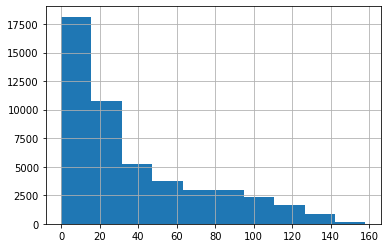

In [293]:
data_ab['number_of_wifi'].hist()

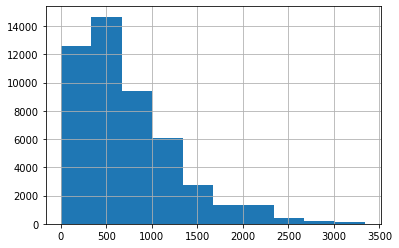

In [294]:
data_ab['number_of_arrest'].hist()

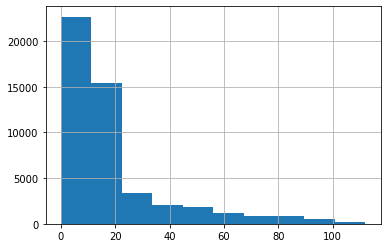

In [295]:
data_ab['number_of_subway_entrance'].hist()

In [288]:
data_ab

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,number_of_free_wifi,number_of_limited_free_wifi,number_of_partner_site,main_wifi_provider,number_of_arrest,major_Borough_of_arrest,major_age_group_of_arrest,major_sex_of_arrest,major_race_of_arrest,number_of_wifi
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,...,4,4,0,ALTICEUSA,81,Brooklyn,25-44,M,BLACK,8
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,...,85,5,1,LinkNYC - Citybridge,2396,Manhattan,25-44,M,BLACK,91
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,...,84,16,0,Harlem,2071,Manhattan,25-44,M,BLACK,100
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,...,16,0,0,LinkNYC - Citybridge,561,Brooklyn,25-44,M,BLACK,16
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,...,54,8,0,LinkNYC - Citybridge,2002,Manhattan,25-44,M,BLACK,62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,...,26,0,0,LinkNYC - Citybridge,615,Brooklyn,25-44,M,BLACK,26
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,...,5,0,0,LinkNYC - Citybridge,553,Brooklyn,25-44,M,BLACK,5
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,...,83,0,0,LinkNYC - Citybridge,1517,Manhattan,25-44,M,BLACK,83
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,...,76,2,0,LinkNYC - Citybridge,2529,Manhattan,25-44,M,BLACK,78


In [7]:
data_ab.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [163]:
merge_data[abs(merge_data['latitude_x']-merge_data['latitude_y'])>1e-6][['latitude_x','latitude_y']]

,latitude_x,latitude_y
825,40.66684,40.66604
863,40.70007,40.70507
1480,40.72668,40.72661
1603,40.77240,40.77445
2729,40.71098,40.71078
...,...,...
42708,40.76802,40.76628
42710,40.77200,40.77192
42713,40.82392,40.82233
42721,40.75606,40.75561


In [162]:
merge_data[abs(merge_data['longitude_x']-merge_data['longitude_y'])>1e-6][['longitude_x','longitude_y']]

,longitude_x,longitude_y
825,-73.95877,-73.95914
863,-73.93268,-73.93530
1480,-73.94794,-73.94586
1603,-73.98034,-73.98496
2729,-74.01616,-74.01623
...,...,...
42710,-73.95520,-73.95369
42713,-73.94622,-73.94687
42721,-73.96748,-73.96723
42724,-73.95045,-73.94867


In [151]:
merge_data[merge_data['reviews_per_month_x']!=merge_data['reviews_per_month_y']][['reviews_per_month_x','reviews_per_month_y']]

,reviews_per_month_x,reviews_per_month_y
0,NaN,NaN
1,4.62,4.64
4,0.39,0.40
5,3.51,3.47
6,0.97,0.99
...,...,...
42721,1.82,NaN
42722,NaN,NaN
42723,1.00,NaN
42724,NaN,NaN


In [154]:
merge_data[(merge_data['reviews_per_month_x'].isna())&(merge_data['reviews_per_month_y'].isna())][['reviews_per_month_x','reviews_per_month_y']]


,reviews_per_month_x,reviews_per_month_y
0,NaN,NaN
17,NaN,NaN
23,NaN,NaN
33,NaN,NaN
175,NaN,NaN
...,...,...
42695,NaN,NaN
42704,NaN,NaN
42715,NaN,NaN
42722,NaN,NaN


In [164]:
merge_data[['price_x',"price_y"]]

,price_x,price_y
0,$150.00,150
1,$89.00,89
2,$80.00,80
3,$200.00,200
4,$60.00,60
...,...,...
42721,$200.00,200
42722,$70.00,70
42723,$50.00,40
42724,$100.00,115


In [191]:
merge_data["new_price_x"]=new_price
merge_data[merge_data["new_price_x"]!=merge_data['price_y']][['id',"new_price_x",'price_y']]

,id,new_price_x,price_y
14,7097,199,215
19,8024,115,130
48,14314,149,144
55,15385,90,80
63,16595,350,275
...,...,...,...
42717,36479723,75,45
42719,36482416,85,75
42720,36482809,85,75
42723,36485057,50,40
